## MODUL I: HISTOGRAM DAN KONVOLUSI _F1D021017

### SOAL NO.1

1. Berdasarkan gambar berikut, munculkanlah diagram dan nilai histogram skala warnanya berdasarkan probabilitas piksel, dan jumlah warna keabuan


### 1. Import Library

Baris code di bawah ini digunakan untuk melakukan import module.

syntax:
from library import members as rename

import digunakan untuk menspesifikasikan member dari library (module) yang akan digunakan dan as digunakan untuk membuat alis ketika melakukan import module

In [1]:
from matplotlib import pyplot as plt
#matplotlib.pyplot digunakan untuk membuat grafik sederhana 2d
import numpy as np
#numpy digunakan untuk membantu dalam membaca gambar ke dalam bentuk array
import cv2 as cv
#cv2 atau OpenCV berfungsi untuk melakukan konversi color space.

### 2. Membaca Citra

In [2]:
image = plt.imread("cipung.jpg")
#fungsi imread digunakan untuk membaca suatu data citra dari file yang mana
#dalam code ini, file citra diberi nama cipung.jpg dan disimpan dalam variabel
#image

### 3. Menampilkan Citra Asli

Fungsi di bawah ini digunakan untuk menampilkan citra asli sebelum diubah ke dalam grayscale. Pada fungsi digunakan parameter image yang telah di-set sebagai variabel global dan berisi gambar dari citra yang akan diolah

In [3]:
def printImage (image):
    plt.imshow(image)
    #imshow digunakan untuk menampilkan data sebagai citra
    plt.title("Original Image")
    #digunakan untuk memberikan judul dari data yang akan ditampilkan
    plt.show

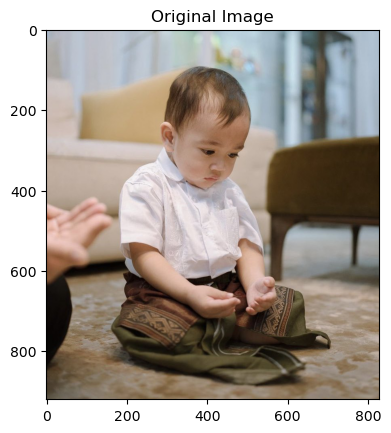

In [4]:
#memanggil fungsi printImage
printImage(image)

### 4. Mengubah Citra ke Dalam Grayscale

Fungsi di bawah ini digunakan untuk mengubah citra berwarna ke dalam grayscale. Fungsi ini nantinya akan mengembalikan hasil pengubahan citra yang telah dilakukan

In [5]:
def turnsGray(image):
    grayimg = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    #fungsi cvtColor digunakan untuk mengubah gamabr ke dalam warna yang diinginkan. 
    #pertama, fungsi akan menerima citra asli yang ditunjukkan oleh image
    #kedua, fungsi akan mengonversikan citra ke dalam bentuk yang diingikan
    #dalam hal ini digunakan cv.COLOR_BGR2GRAY
    #hasil color space conversion disimpan ke dalam variable grayimg
    return grayimg

### 5. Menampilkan Citra dalam Grayscale

Fungsi di bawah ini digunakan untuk menampilkan hasil dari pengolahan citra pada fungsi turnsGray

In [6]:
def printGray(image):
    grayimg = turnsGray(image)
    #memasukkan hasil pengolahan citra ke dalam variabel grayimg
    plt.title ("Grayed Image Histogram")
    plt.imshow(grayimg, cmap = 'gray')
    #menampilkan hasil citra
    #dalam baris perintah ini digunakan library matplotlib, maka harus digunakan
    #colormap (cmap).
    #apabila tidak menggunakan cmap, maka secara default akan dihasilkan citra
    #dengan warna yang berbeda dari yang telah diolah sebelumnya

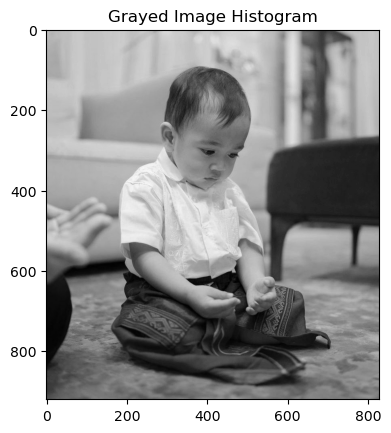

In [7]:
#menampilkan citra dalam grayscale
printGray(image)

### 6. Mencari Intensitas Keabuan tiap Pixel

Fungsi di bawah ini digunakan untuk mencari intensitas keabuan dari tiap pixel pada citra

In [8]:
def getShape(image):
    grayimg = turnsGray(image)
    
    img_height = grayimg.shape  [0]
    #shape digunakan menyimpan dimensi dari sebuah object
    #memasukkan nilai tinggi dari citra ke dalam variable img_height
    img_width =  grayimg.shape  [1]
    #memasukkan nilai lebar dari citra ke dalam variable img_width
    print(img_height,img_width)
    histogram = np.zeros(256).astype(int)
    #np.zeros deigunakan untuk membuat arrray baru berisikan 0 dengan 
    #array yang dibuat adalah array 1D array dengan size 256 dan menampung
    #data dengan tipe int
    for x in range (0,img_height):
        #melakukan perulangan dari 0 sampai dengan besar dari tinggi citra
        for y in range (0,img_width):
            #melakukan perulangan dari 0 sampai dengan besar dari lebar citra
            histogram[grayimg[x,y]] += 1
            #setiap nilai pixel akan dimasukkan ke dalam variabel histogram dan apabila ditemui
            #nilai pixel yang sama lagi maka akan ditambahkan satu
            #ex: pada array grayimg[0][0] == 0 maka indeks variabel histogram akan menjadi 
            #histogram[0]
    return histogram
    #mengembalikan nilai

In [9]:
#memanggil fungsi getShape
getShape(image)

920 827


array([   9,  125,  200,  468,  778, 1176, 1878, 1689, 1719, 1922, 1633,
       2033, 2127, 1806, 1694, 1802, 1846, 1874, 1929, 1931, 1944, 1916,
       1838, 1817, 1930, 1994, 1934, 1948, 2173, 3087, 4100, 5088, 6176,
       6114, 5822, 5169, 4261, 3634, 3546, 3520, 3333, 3216, 2992, 3096,
       3165, 2891, 2555, 2249, 2098, 2080, 2073, 2067, 2092, 2164, 2112,
       2204, 2235, 2283, 2376, 2394, 2419, 2426, 2452, 2567, 2632, 2467,
       2538, 2386, 2474, 2493, 2368, 2423, 2424, 2323, 2405, 2360, 2371,
       2398, 2468, 2484, 2363, 2210, 2104, 2094, 2003, 2074, 2135, 2213,
       2114, 2126, 2281, 2304, 2225, 2302, 2162, 2191, 2184, 2357, 2243,
       2282, 2529, 2672, 2644, 2657, 2627, 2745, 2813, 2626, 2623, 2706,
       2908, 2829, 2886, 2918, 2842, 2926, 3055, 3120, 3052, 3163, 3205,
       3095, 3289, 3117, 3174, 3218, 3208, 3374, 3310, 3480, 3652, 3966,
       4047, 4182, 4041, 4045, 4104, 4077, 3979, 4042, 4076, 3973, 4024,
       3813, 3903, 3814, 3639, 3921, 3906, 4272, 41

Fungsi di bawah ini digunakan apabila dirasa perlu untuk melakukan pengecekan intensitas pada tiap pixel dengan format yang lebih terstruktur

In [10]:
def showDetail(image):
    gray_histo = getShape(image)
    #memasukkan nilai ke variabel gray_histo dengan nilai berupa array hasil dari pencarian intesitas pixel yang telah
    #dilakukan pada fungsi getShape
    for i in range (0,len(gray_histo)):
        #melakukan perulangan dari 0 sampai dengan besaran dari variabel gray_histo
        print("Histogram [",i,"] : ", gray_histo[i])

In [11]:
showDetail(image)
#memanggil fungsi showImage

920 827
Histogram [ 0 ] :  9
Histogram [ 1 ] :  125
Histogram [ 2 ] :  200
Histogram [ 3 ] :  468
Histogram [ 4 ] :  778
Histogram [ 5 ] :  1176
Histogram [ 6 ] :  1878
Histogram [ 7 ] :  1689
Histogram [ 8 ] :  1719
Histogram [ 9 ] :  1922
Histogram [ 10 ] :  1633
Histogram [ 11 ] :  2033
Histogram [ 12 ] :  2127
Histogram [ 13 ] :  1806
Histogram [ 14 ] :  1694
Histogram [ 15 ] :  1802
Histogram [ 16 ] :  1846
Histogram [ 17 ] :  1874
Histogram [ 18 ] :  1929
Histogram [ 19 ] :  1931
Histogram [ 20 ] :  1944
Histogram [ 21 ] :  1916
Histogram [ 22 ] :  1838
Histogram [ 23 ] :  1817
Histogram [ 24 ] :  1930
Histogram [ 25 ] :  1994
Histogram [ 26 ] :  1934
Histogram [ 27 ] :  1948
Histogram [ 28 ] :  2173
Histogram [ 29 ] :  3087
Histogram [ 30 ] :  4100
Histogram [ 31 ] :  5088
Histogram [ 32 ] :  6176
Histogram [ 33 ] :  6114
Histogram [ 34 ] :  5822
Histogram [ 35 ] :  5169
Histogram [ 36 ] :  4261
Histogram [ 37 ] :  3634
Histogram [ 38 ] :  3546
Histogram [ 39 ] :  3520
Histogram

### 7. Membuat Histogram berdasarkan Jumlah Warna Keabuan

Fungsi di bawah ini digunakan untuk membuat histogram berdsarkan jumlah warna keabuan yang telah didapatkan sebelumnya

In [12]:
def amountOfGray(image):
    yhistogram = getShape(image)
    #memasukkan nilai dari jumlah pixel ke dalam variabel yhistogram
    xhistogram = [i for i in range (256)]
    #memasukkan nilai dari 0-255 dengan menggunakan perulangan
    c = ['aquamarine','turquoise','lightseagreen','mediumturquoise']
    #memasukkan warna yang akan digunakan dalam menampikan grafik bar
    plt.bar(xhistogram,yhistogram, color = c)
    #membuat bar diagram yang mana pada x axis akan diisi oleh nilai dari variable xhistogram
    #y axis akan diisi oleh nilai dari variabel yhsitogram
    # dan warna yang akan ditampilkan berasaln dari warna-warna yang telah disimpan di dalam variabel c
    plt.title ("Grayscale Histogram")
    #menampilkan judul dari diagram
    plt.xlabel ("Intensity Level")
    #memberikan penamaan untuk x axis
    plt.ylabel ("Intesity Frequency")
    #memberikan penamaan untuk y axis
    plt.show

920 827


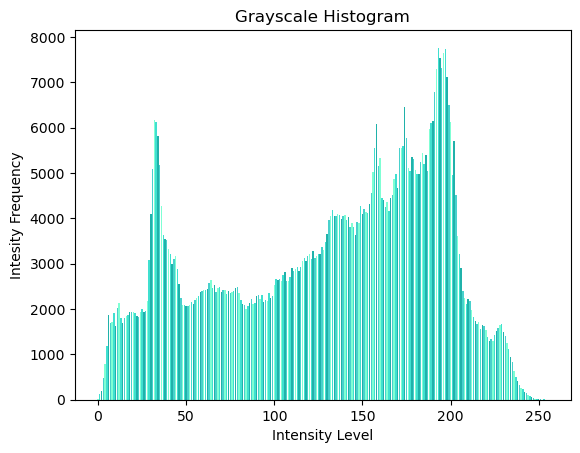

In [13]:
amountOfGray(image)

### 8. Membuat Histogram Berdasarkan Probabilitas Piksel

Fungsi ini digunakan untuk membuat histogram berdasarkan probabilitas dari kemunculan level keabuan pada citra. 
Tidak berbeda jauh dari fungsi histogram sebelumnya. Perbedaannya terlihat pada nilai variabel yhistogram yang dibagi dengan
hasil perkalian dari tinggi dan lebar citra.

Rumus:
    hi=ni/n   

In [14]:
def grayProbs(image):
    grimg = turnsGray(image)
    yhistogram = getShape(image)/grimg.shape[0]*grimg.shape[1]
    #implementasi rumus hi = ni/n
    xhistogram = [i for i in range (256)]
    c = ['indigo','darkorchid','darkviolet','mediumorchid','thistle']
    plt.bar(xhistogram,yhistogram, color = c)
    plt.title (" Gray Probality Histogram")
    plt.xlabel ("Intensity Level")
    plt.ylabel ("Intesity Probabilites")
    plt.show

920 827


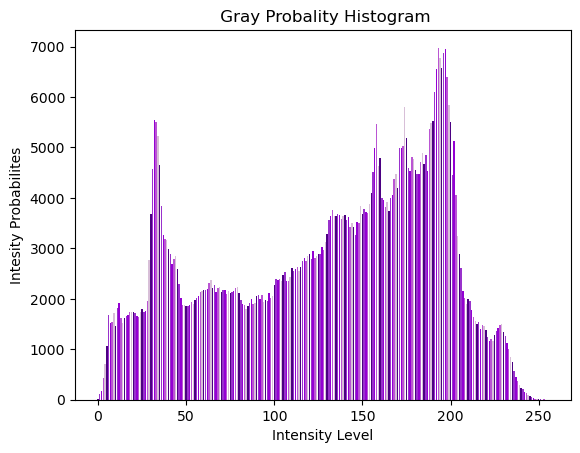

In [15]:
grayProbs(image)

## SOAL NO.2

2. Lakukanlah konvolusi pada citra dengan zero padding dan tanpa padding dengan kernel berikut
([
    [0, 0,-1, 1],
    [0, 2, 1, -1],
    [-1, 1, 2, 0],
    [1, -1, 0, 0]
])


### 1. Melakukan deklarasi serta inisialisasi nilai filter yang akan digunakan dalam melakukan perhitungan konvolusi

In [16]:
kernel = np.array([[0,0,-1,1],[0,2,1,-1],[-1,1,2,0],[1,-1,0,0]])
#membuat array menggunakan np.array dengan ukuran 4x4

In [17]:
kernel_h = kernel.shape[0] 
#kernel_h digunakan untuk menampung besaran tinggi dari kernel
kernel_w = kernel.shape[1]
#kernel_w digunakan untuk menampung besaran lebar dari kernel

### 2. Melakukan Perhitungan Konvolusi

Fungsi di bawah ini digunakan untuk menghitung konvolusi baik menggunakan padding ataupun zero padding (ditunjukkan dengan parameter isPadd yang bernilai boolean).Berikutnya, apabila proses clipping dibutuhkan maka akan diteruskan kepada fungsi yang akan melakukan proses clipping tsb. 

In [32]:
def countPadd(isPadd, isClip):
    #variabel isPadd bernilai boolean dan digunakan sebagai parameter apakah perhitungan akan menggunakan paddin atau tidak
    #variabel isClip bernilai boolean dan digunakan sebagai parameter apakah akan dilakukan clipping setelah perhitungan
    #konvolusi selesai dilakukan
    
    if isPadd == True:
        #perhitungan akan dilakukan menggunakan zero padding apabila isPadd bernilai true
        
        conv_result = np.zeros(((turnsGray(image).shape[0]),(turnsGray(image).shape[1])))
        #membuat array dengan besaran sesuai citra dalam grayscale yang akan diolah dan berisi 0
        
        padd_size = (kernel_w-1)//2 
        #variable padd_size digunakan untuk menentukan besaran padding yang optimal untuk dilakukan 
        #tanda "//" digunakan agar hasil pembagian otomatis berupa bilangan integer (tanpa koma)
        
        conv_img   = np.pad ((turnsGray(image)),(padd_size,padd_size+1))
        #np.pad digunakan untuk melakukan padding pada sisian array yang mana dalam hal ini
        #parameter pertama menunjukkan array yang akan dilakukan padding
        #parameter kedua, yaitu padd width menunjukkan pada bagian mana saja akan dilakukan 
        
    else:
        conv_result = np.zeros(((turnsGray(image).shape[0]-kernel_h+1),(turnsGray(image).shape[1]-kernel_w+1)))
        #membuat array yang berisikan 0
        #karena tidak menggunakan padding maka ukuran hasil citra akan berubah, oleh karena itu digunakan rumus
        #(I-F+1, I-F+1) untuk mencari ukuran citra setelah dikonvolusikan dengan I=Image dan F= Filter
        
        conv_img    = turnsGray(image)
        #membuat array yang berisi nilai-nilai pada citra abu yang akan diolah dan ukurannya pun mengikuti dari 
        #ukuran citra
        
    for i in range (conv_result.shape[0]):
        for j in range (conv_result.shape[1]):
            conv_result[i][j] = round((conv_img[i:i + kernel_h, j:j + kernel_w] * kernel).sum())
            #sum of product dari kernel dengan citra 
            
    if isClip == True:
        #apbila, variabel isClip bernilai true yang berarti proses clipping akan dilakukan maka dilakukan pemanggila fungsi
        #countClip dengan parameter hasil dari konvolusi yang telah dilakukan
        
        conv_result = countClip(conv_result)
        #melakukan pengisian pada variabel conv_result dengan hasil clipping yang telah dilakukan
        
    return conv_result
    #mengembalikan nilai konvolusi citra kepada fungsi pemanggil

### 3. Melakukan Perhitungan dengan Clipping

Fungsi di bawah ini berguna untuk mengelola hasil konvolusi untuk berikutnya dilakukan proses clipping yang mana apabila nilai berada di bawah 0 maka akan dibulatkan menjadi 0 dan apabila berada di atas 255 maka akan dibulatkan ke dalam 255

In [33]:
def countClip(conv_result):
    for i in range (conv_result.shape[0]):
    #melakukan perulangan sesuai besaran tinggi dari citra hasil konvolusi
        for j in range (conv_result.shape[1]):
        #melakukan perulangan sesuai besaran lebar dari citra hasil konvolusi
        
            if conv_result[i][j] > 255:
                #pengkondisian apabila elemen pada indeks ke-[i][j] bernilai lebih dari 255 
                
                conv_result[i][j] = 255
                #mengubah nilai pada elemen tsb menjadi 255
                
            elif conv_result[i][j] < 0:
                 #pengkondisian apabila elemen pada indeks ke-[i][j] bernilai kurang dari 0
                    
                conv_result[i][j] = 0
                #mengubah nilai pada elemen tsb menjadi 0
            else:
                conv_result[i][j] = conv_result[i][j]
                #apabila nilai pada elemen tidak bernilai lebih dari 255 ataupun kurang dari 0 maka nilai akan dibiarkan tetap
   
    return conv_result
    #mengembalikan nilai kepada fungsi pemanggil 

### 4. Menampilkan Citra Hasil Perhitungan Konvolusi

Fungsi di bawah ini digunakan untuk menampilkan hasil citra yang telah dikonvolusikan dengan menggunakan paramter apakah citra yang akan ditampilkan akan dikonvulasikan menggunakan padding atau tidak (isPadd) dan dilanjutkan dengan apakah pengolahan citra akan dilakukan dengan proses clipping (isClip)

In [34]:
def printConv(isPadd,isClip):
    conv_print = countPadd(isPadd, isClip)
    #memasukkan nilai hasil dari pengolahan citra yang dilakukan pada fungsi countPadd dan memiliki 2 parameter
    #isPadd : bernilai boolean dan menunjukkan apakah citra akan dikonvolusikan dengan padding atau tidak
    #isClip : bernilai booelan dan menunjukkan apakah akan dilakukan proses clipping pada citra atau tidak
    
    plt.imshow(conv_print,cmap='gray')
    #menampilkan hasil citra
    #dalam baris perintah ini digunakan library matplotlib, maka harus digunakan
    #colormap (cmap).
    #apabila tidak menggunakan cmap, maka secara default akan dihasilkan citra
    #dengan warna yang berbeda dari yang telah diolah sebelumnya

#### Menampilkan Citra Hasil Konvolusi Tanpa Padding dan Menggunakan Clipping

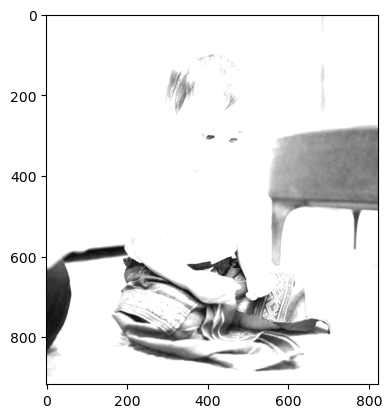

In [35]:
printConv(0,1)

#### Menampilkan Citra Hasil Konvolusi Tanpa Padding dan Tanpa Clipping

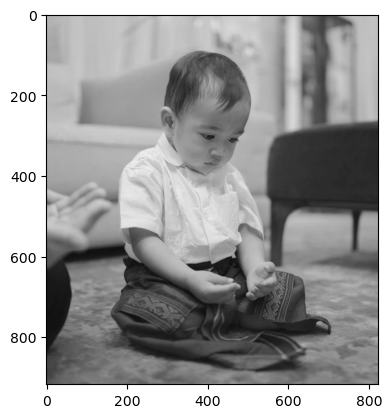

In [36]:
printConv(0,0)

In [37]:
#### Menampilkan Citra Hasil Konvolusi dengan Padding dan dengan Clipping

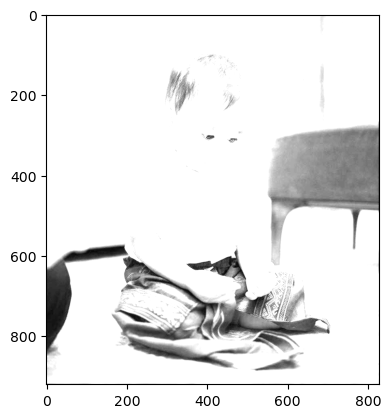

In [38]:
printConv(1,1)

#### Menampilkan Citra Hasil Konvolusi dengan Padding dan Tanpa Clipping

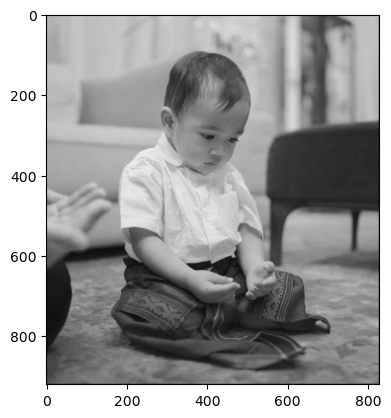

In [39]:
printConv(1,0)